# Fall 2022 Data Science Intern Challenge 


On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory data analysis (EDA)

In [26]:
df = pd.read_csv('Sheet1.csv')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [27]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


### Analysis of the average order value (AOV)

In [28]:
# Check duplicate orders
len(df['order_id'].unique())

5000

In [29]:
# aov = total_revenue/the_number_of_orders

total_revenue = sum(df['order_amount'])
the_number_of_orders = len(df['order_id'])
aov = total_revenue/the_number_of_orders

print(aov)

3145.128


In [18]:
df["order_amount"].max()

704000

In [19]:
df["order_amount"].min()

90

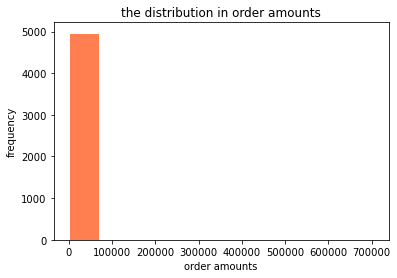

In [35]:
plt.hist(df['order_amount'], color= 'coral', ec='white')
plt.title('the distribution in order amounts')
plt.xlabel('order amounts')
plt.ylabel('frequency')
plt.grid(b=False)

## Detecting Outliner

#### It can be seen that there is a outliner at order_amount value approximately 704000

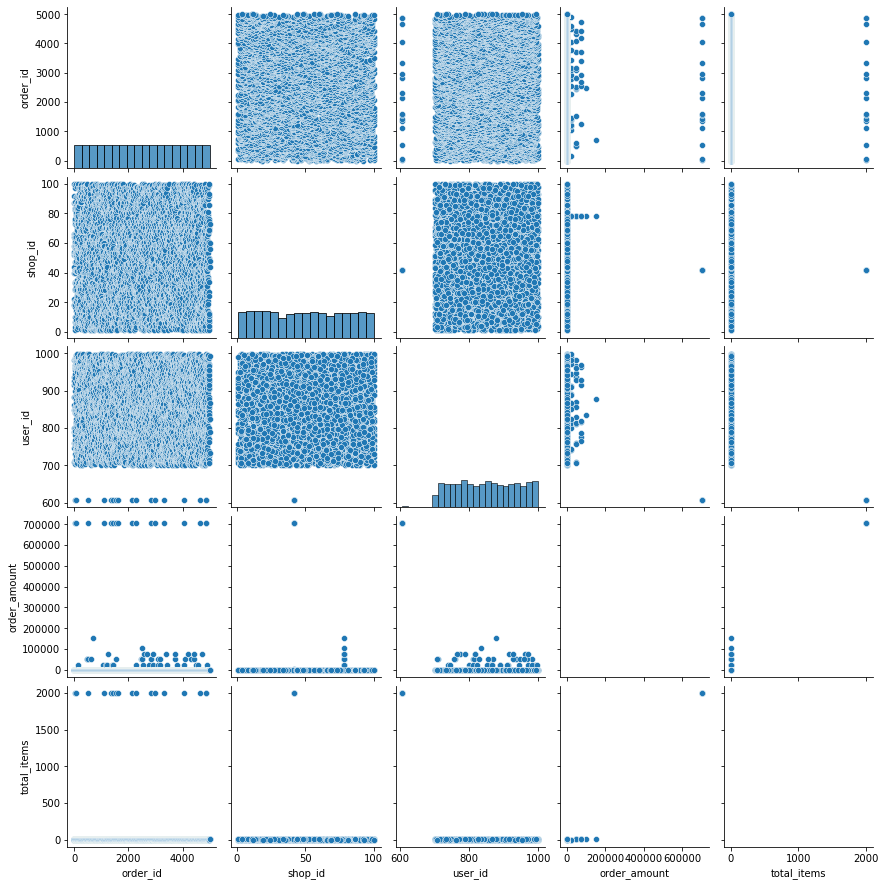

In [20]:
sns.pairplot(df)

<AxesSubplot:xlabel='order_amount', ylabel='user_id'>

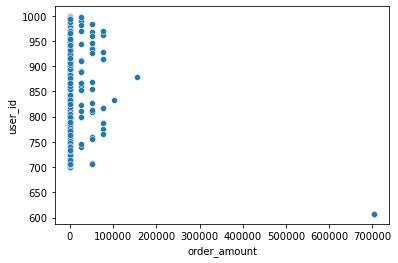

In [23]:
sns.scatterplot(x="order_amount", y="user_id", data=df)

### The Repeat Purchase Density

/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='user_id', ylabel='Density'>

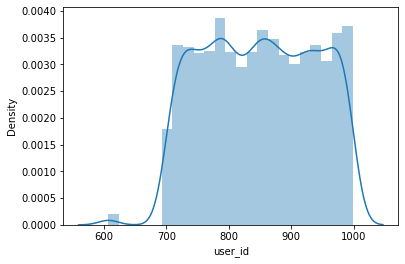

In [25]:
sns.distplot(df["user_id"])

### Observing details of max order amount

In [36]:
df[df['order_amount'] == 704000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


# Question 1

#### 1.  Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

What could be going wrong with our calculation is the **outliner**. An outliner of 704000 was detected during Exploratory data analysis, and $3145.13 of an Average Order Value (AOV) includes this outliner value, which could significantly impact to mean. Thus, this caused the AOV to be skewed essentially higher than it should be. It can be seen that the highest order amount comes from user_id: 607, who made their orders in shop_id: 42 at the same time at 4 am almost every day in March.

Some of the better ways is segment customers before apply AOV. We can **segment customers** into multiple groups based on their purchase histories, such as splitting their customer base into low, medium, and high purchases. Then, calculate the Average Order Value for each segment to understand customer behaviour in different segments.

However, the best way to evaluate this data with outliers existing would be using **median**.


#### 2. What metric would you report for this dataset?

I will use the **median of the middle 50%** of the dataset as a metric to report for this dataset.

#### 3. What is its value?

284.0

In [48]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

# Questions 2

#### 1. How many orders were shipped by Speedy Express in total?

=> 54

```SELECT COUNT(DISTINCT OrderID) AS NumberOfOrders
FROM Orders
JOIN Shippers ON Shippers.ShipperID = Orders.ShipperID
WHERE Shippers.ShipperName = "Speedy Express"```

#### 2. What is the last name of the employee with the most orders?

=> Peacock

```SELECT Employees.LastName, COUNT(DISTINCT OrderID) AS NumberOfOrders
FROM Orders
JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID
GROUP BY Employees.LastName
ORDER BY NumberOfOrders DESC
LIMIT 1```

#### 3. What product was ordered the most by customers in Germany?

=> Steeleye Stout

```SELECT Products.ProductName, Customers.Country, OrderDetails.Quantity
FROM Orders
INNER JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID
INNER JOIN Products ON Products.ProductID = OrderDetails.ProductID
INNER JOIN Customers ON Customers.CustomerID = Orders.CustomerID
WHERE Country = "Germany"
GROUP BY Products.ProductName
ORDER BY Quantity DESC
LIMIT 1```